In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Files/house_prices.csv")

In [3]:
df

,House Size,House Price
0,1500,350000
1,1800,400000
2,2000,450000
3,2200,475000
4,2500,525000
5,2800,575000
6,3000,600000
7,3200,650000
8,3500,700000
9,4000,750000


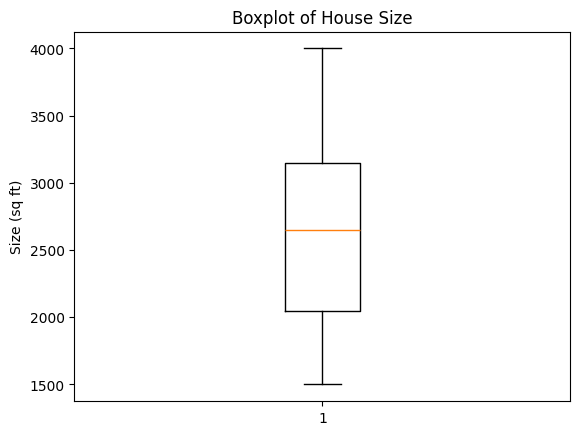

In [14]:
Q1 = df['House Size'].quantile(0.25)
Q3 = df['House Size'].quantile(0.75)

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier = df[(df['House Size'] < lower_bound) | (df["House Size"] > upper_bound)]

df_cleaned = df[(df['House Size'] >= lower_bound) & (df["House Size"] <= upper_bound)]

plt.boxplot(df['House Size'])
plt.title("Boxplot of House Size")
plt.ylabel("Size (sq ft)")
plt.show()

In [5]:
X = df_cleaned['House Size']
Y = df_cleaned['House Price']

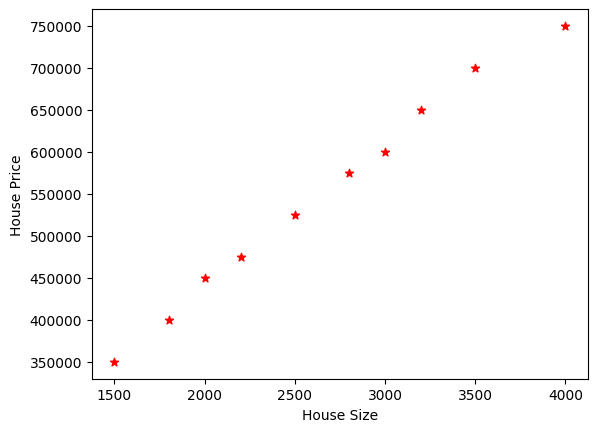

In [6]:
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.scatter(df_cleaned['House Size'],df_cleaned['House Price'], color='red', marker='*')

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(df_cleaned[['House Size']],df_cleaned[['House Price']])

LinearRegression()

In [9]:
reg.coef_

array([[164.24802111]])

In [10]:
reg.intercept_

array([112242.74406332])

In [11]:
164.24802111 * 2020 + 112242.74406332464

444023.7467055246

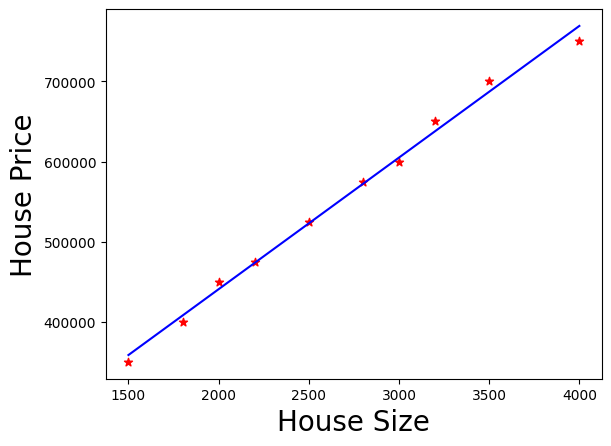

In [12]:
plt.scatter(df_cleaned['House Size'], df_cleaned['House Price'], color='red', marker='*')

plt.plot(df_cleaned['House Size'], reg.predict(df_cleaned[['House Size']]), color='blue')

plt.xlabel('House Size', fontsize=20)
plt.ylabel('House Price', fontsize=20)

plt.show()

In [13]:
df_cleaned.corr()

,House Size,House Price
House Size,1.00000,0.99693
House Price,0.99693,1.00000
